# Example

c:\Users\axela\anaconda3\envs\iss_decoding\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
c:\Users\axela\anaconda3\envs\iss_decoding\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\axela\anaconda3\envs\iss_decoding\lib\site-packages\squidpy\pl\_utils.py:556: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_labels = adata.obs[key][row_order]


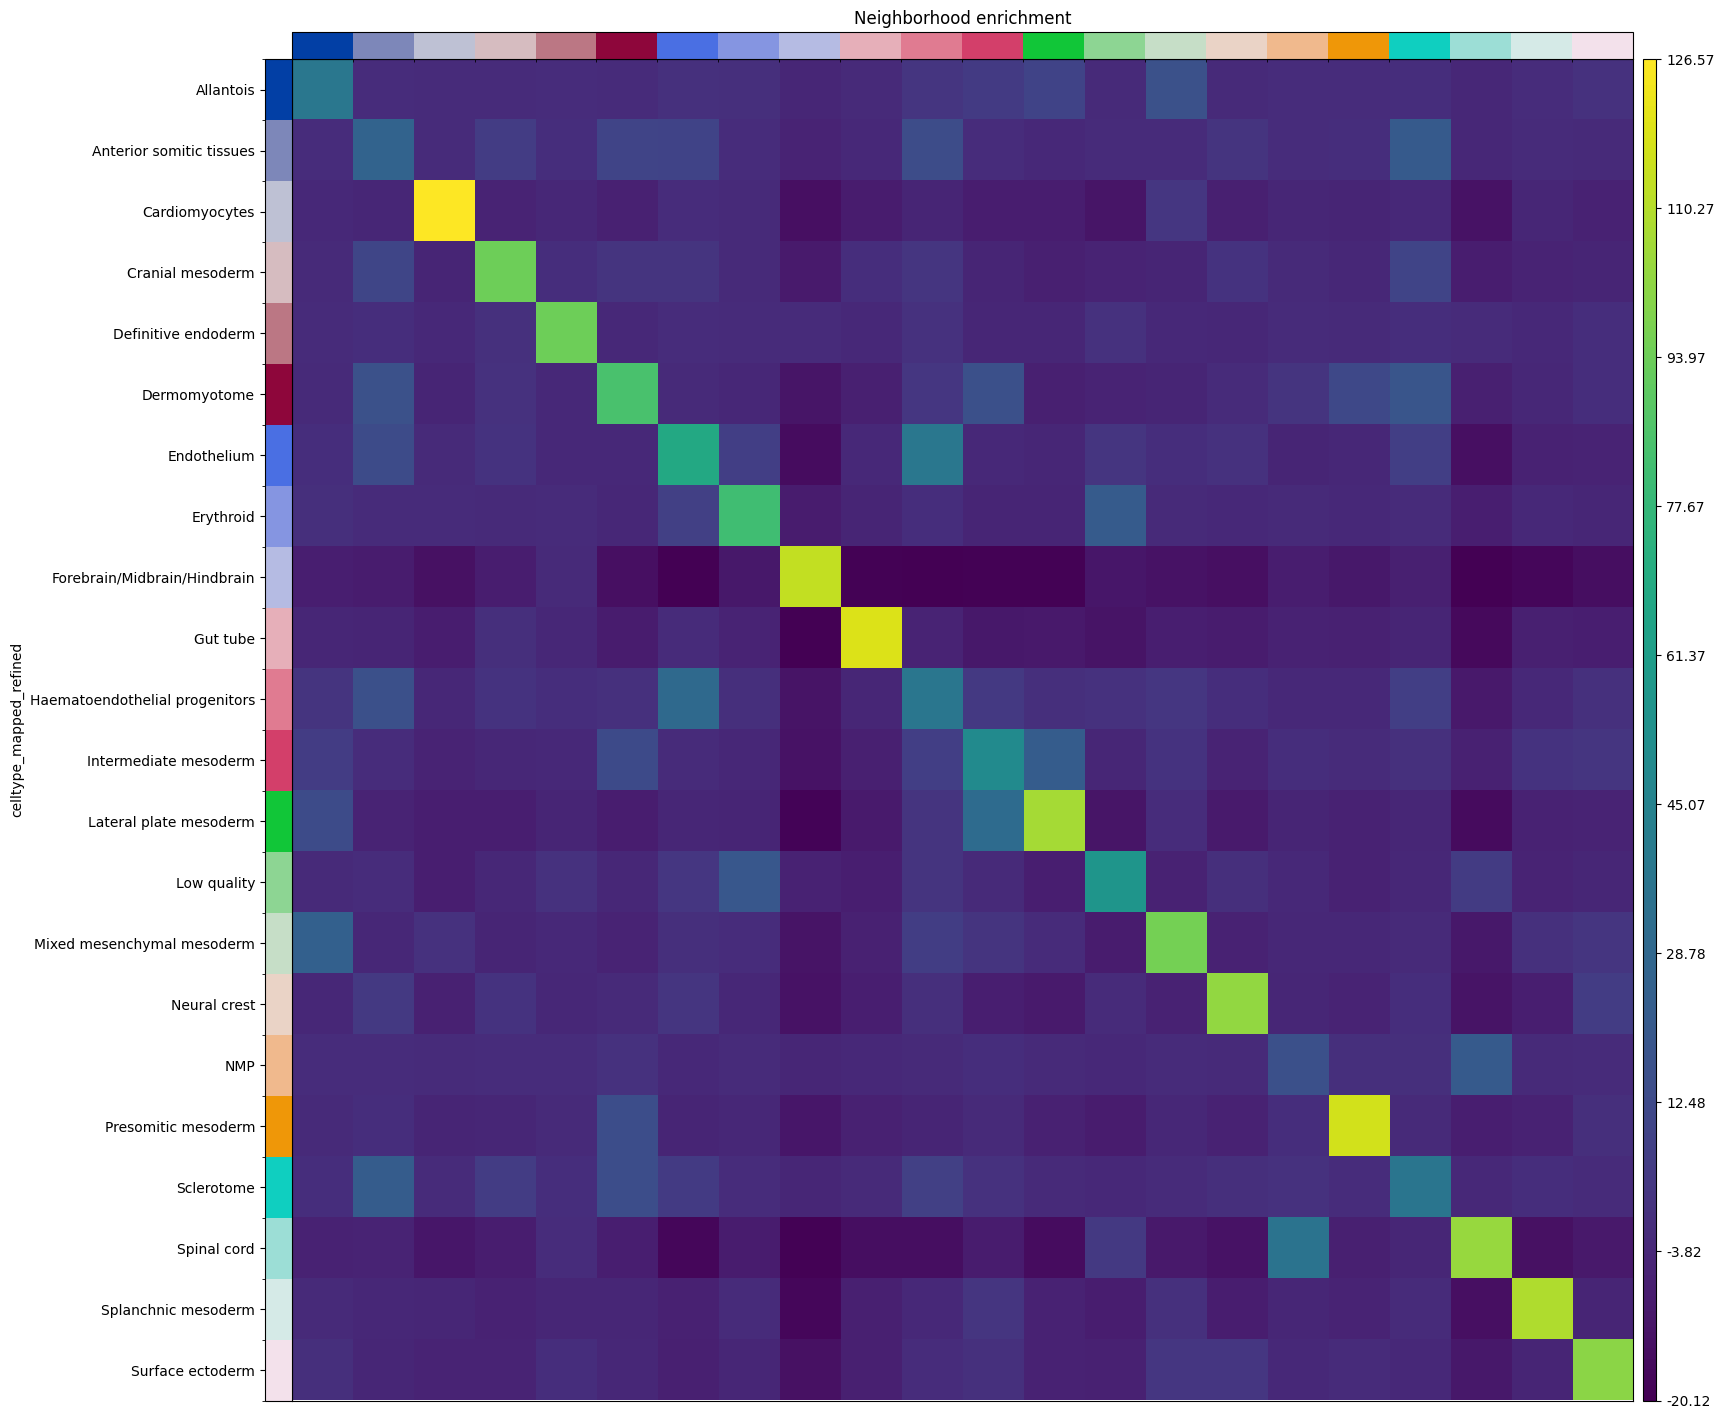

In [8]:
import squidpy as sq
from nhood_enrichment import nhood_enrichment
# Load example data from Squidpy
adata = sq.datasets.seqfish()

# Create the graph
sq.gr.spatial_neighbors(adata)

# Run the enrichment
nhood_enrichment(adata, cluster_key='celltype_mapped_refined')

# Plot
sq.pl.nhood_enrichment(adata, cluster_key='celltype_mapped_refined')

Reproducing the correlation scores in the pre-print

In [9]:
import numpy as np
import pandas as pd
import anndata
from scipy.stats import spearmanr, pearsonr

def load_osmFISH_data():
    csv = pd.read_csv(r'C:\Users\axela\Documents\GitHub\Points2Region_clean\datasets\osmFISH\osmFISH_real.csv')
    xy = csv[['X','Y']].to_numpy()
    adata = anndata.AnnData(obs={'Gene' : csv['Gene'].to_list()}, obsm={'spatial' : xy})
    adata.obs['Gene'] = adata.obs['Gene'].astype('category')
    return adata

def load_merfish_data():
    csv = pd.read_csv(r'C:\Users\axela\Documents\GitHub\Points2Region_clean\datasets\MERFISH\data.csv')
    xy = csv[['X','Y']].to_numpy()
    adata = anndata.AnnData(obs={'Gene' : csv['Gene'].to_list()}, obsm={'spatial' : xy})
    adata.obs['Gene'] = adata.obs['Gene'].astype('category')
    return adata  

datasets = [
    {
        'name' : 'Seqfish',
        'adata' : sq.datasets.seqfish(),
        'key' : 'celltype_mapped_refined',
        'library_key' : None
    },
    {
        'name' : 'IMC',
        'adata' : sq.datasets.imc(),
        'key' : 'cell type',
        'library_key' : None

    },
    {
        'name' : 'MERFISH',
        'adata' : sq.datasets.merfish(),
        'key' : 'Cell_class',
        'library_key' : 'batch'
    },
    {
        'name' : 'MIBI-TOF',
        'adata' : sq.datasets.mibitof(),
        'key' : 'Cluster',
        'library_key' : 'batch'
    },
    {
        'name' : 'Visium',
        'adata' : sq.datasets.visium_fluo_adata(),
        'key' : 'cluster',
        'library_key' : None
    },

    {
        'name' : '4i',
        'adata' : sq.datasets.visium_fluo_adata(),
        'key' : 'leiden',
        'library_key' : None
    },

    {
        'name' : 'osmFISH dataset (Genes)',
        'adata' : load_osmFISH_data(),
        'key' : 'Gene',
        'library_key' : None,
        'output_name' : 'osmFISH'
    },
    {
        'name' : 'MERFISH dataset (Genes)',
        'adata' : load_merfish_data(),
        'key' : 'Gene',
        'library_key' : None,
        'output_name' : 'merfish_genes'
    }
]

def pearson(a: np.ndarray, b: np.ndarray) -> float:
    return pearsonr(a.flatten(), b.flatten()).statistic

def spearman(a: np.ndarray, b: np.ndarray) -> float:
    p, _ = spearmanr(a.flatten(), b.flatten())
    return p

results = {
    'Dataset' : [],
    'Pearson' : [],
    'Spearman' : []
} 

for dataset in datasets:
    name = dataset['name']
    adata = dataset['adata']
    library_key = dataset['library_key']
    cluster_key = dataset['key']

    # Incase several replicates, select first
    if library_key is not None:
        ids = adata.obs[library_key]
        uid = ids.unique()[0]
        adata = adata[adata.obs[library_key] == uid]

    # Compute neighbors
    sq.gr.spatial_neighbors(adata)

    # Compute zscores
    zscore_analytical, _ = nhood_enrichment(adata, cluster_key=cluster_key, copy=True)
    zscore_squidpy, _ = sq.gr.nhood_enrichment(adata, cluster_key=cluster_key, copy=True, show_progress_bar=False)
    

    zscore_squidpy[np.isnan(zscore_squidpy)] = 0
    p, s = pearson(zscore_analytical, zscore_squidpy), spearman(zscore_analytical, zscore_squidpy)

    results['Dataset'].append(name)
    results['Spearman'].append(s)
    results['Pearson'].append(p)

results = pd.DataFrame(results)

c:\Users\axela\anaconda3\envs\iss_decoding\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
c:\Users\axela\anaconda3\envs\iss_decoding\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
c:\Users\axela\anaconda3\envs\iss_decoding\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
c:\Users\axela\anaconda3\envs\iss_decoding\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
c:\Users\axela\anaconda3\envs\iss_decoding\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprec

KeyboardInterrupt: 

In [ ]:
display(results)

,Dataset,Pearson,Spearman
0,Seqfish,0.986163,0.986770
1,IMC,0.964210,0.993883
2,MERFISH,0.980917,0.989529
3,MIBI-TOF,0.974419,0.975641
4,Visium,0.994463,0.989530
5,4i,0.994163,0.989860


# Timing

In [ ]:
import time

def timeit(fun, n=5):
    times = []
    for _ in range(n):
        start = time.time()
        fun()
        stop = time.time()
        elapsed_time = stop - start
        times.append(elapsed_time)
    return np.mean(times), np.std(times)

results_timing = {
    'Dataset' : [],
    'Avg wall clock time [s] (Analytical)' : [],
    'Std wall clock time [s] (Analytical)' : [],
    'Avg wall clock time [s] (Squidpy)' : [],
    'Std wall clock time [s] (Squidpy)' : []
} 

for dataset in datasets:
    name = dataset['name']
    adata = dataset['adata']
    library_key = dataset['library_key']
    cluster_key = dataset['key']

    # Incase several replicates, select first
    if library_key is not None:
        ids = adata.obs[library_key]
        uid = ids.unique()[0]
        adata = adata[adata.obs[library_key] == uid]

    # Compute neighbors
    sq.gr.spatial_neighbors(adata)

    # Compute zscores
    avg_time_analytical, std_time_analytical = timeit(lambda  : nhood_enrichment(adata, cluster_key=cluster_key, copy=True))
    avg_time_squidpy, std_time_squidpy = timeit(lambda : sq.gr.nhood_enrichment(adata, cluster_key=cluster_key, copy=True, show_progress_bar=False))

    results_timing['Dataset'].append(name)
    results_timing['Avg wall clock time [s] (Analytical)'].append(avg_time_analytical)
    results_timing['Std wall clock time [s] (Analytical)'].append(std_time_analytical)
    results_timing['Avg wall clock time [s] (Squidpy)'].append(avg_time_squidpy)
    results_timing['Std wall clock time [s] (Squidpy)'].append(std_time_squidpy)


results_timing = pd.DataFrame(results_timing)

c:\Users\axela\anaconda3\envs\iss_decoding\lib\site-packages\squidpy\gr\_utils.py:198: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data
c:\Users\axela\anaconda3\envs\iss_decoding\lib\site-packages\squidpy\gr\_nhood.py:188: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)
c:\Users\axela\anaconda3\envs\iss_decoding\lib\site-packages\squidpy\gr\_utils.py:198: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data


In [ ]:
results_timing['Speed-up'] = results_timing['Avg wall clock time [s] (Squidpy)'] / results_timing['Avg wall clock time [s] (Analytical)']

In [ ]:
display(results_timing)

,Dataset,Avg wall clock time [s] (Analytical),Std wall clock time [s] (Analytical),Avg wall clock time [s] (Squidpy),Std wall clock time [s] (Squidpy),Speed-up
0,Seqfish,0.005953,0.000855,1.086361,0.115733,182.477857
1,IMC,0.001360,0.000475,0.140088,0.007217,102.995273
2,MERFISH,0.001795,0.000522,0.215983,0.010593,120.294750
3,MIBI-TOF,0.000784,0.000402,0.039016,0.003178,49.788445
4,Visium,0.001098,0.000390,0.098488,0.006106,89.681340
5,4i,0.001065,0.000483,0.098982,0.005607,92.929513


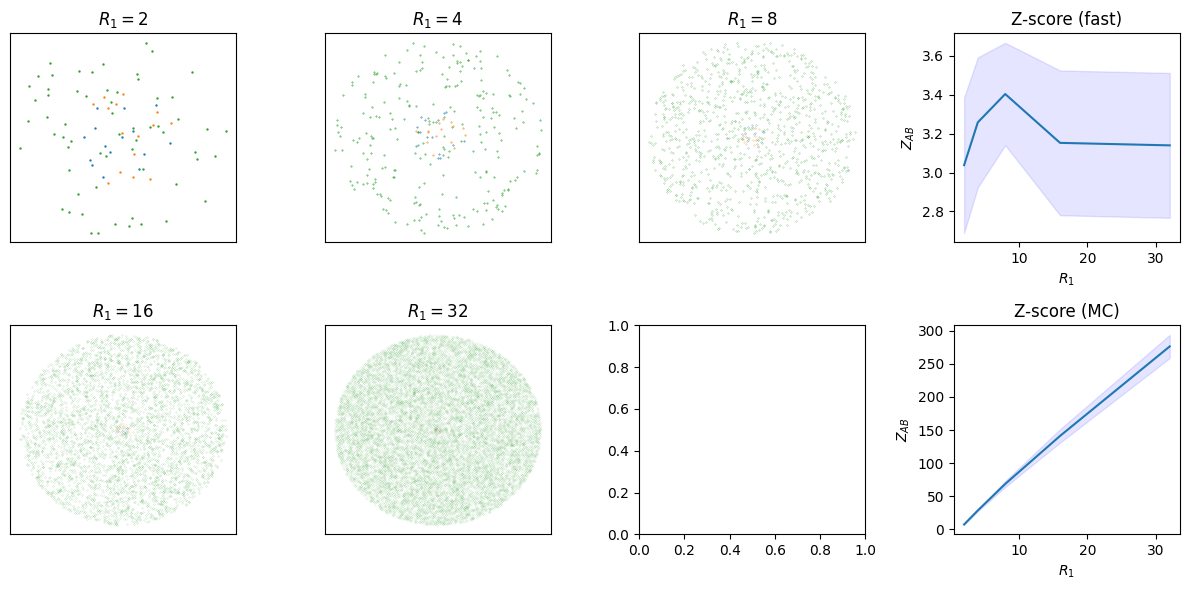

In [30]:
import numpy as np
import anndata
import squidpy as sq
import matplotlib.pyplot as plt
from nhood_enrichment import nhood_enrichment

np.random.seed(42)

points_per_area = 5
def sample(R):
    points = int(points_per_area * R**2 * np.pi)
    theta = np.random.rand(points) * 2 * np.pi
    radius = np.sqrt(np.random.rand(points)) * R
    x = np.cos(theta) * radius
    y = np.sin(theta) * radius
    return np.column_stack((x,y))


R0 = 1
R1 = [2,4,8,16,32]

zscore_analytical_list = []
zscore_squidpy_list = []


fig, axs = plt.subplots(2,4, figsize=(3*4,6))

for i,R1i in enumerate(R1):
    z_an = []
    z_sq = []
    for _ in range(15):
        xy_A = sample(R0)
        xy_B = sample(R0)
        xy_C = sample(R1i)
        xy = np.vstack((xy_A,xy_B,xy_C))
        labels = ['A'] * len(xy_A) + ['B'] * len(xy_B) + ['C'] * len(xy_C)
        adata = anndata.AnnData(obs={'labels' : labels}, obsm={'spatial' : xy})
        adata.obs['labels'] = adata.obs['labels'].astype('category')
        sq.gr.spatial_neighbors(adata,coord_type = 'generic', radius = R0)
        zscore_analytical, _ = nhood_enrichment(adata, cluster_key='labels', copy=True, radius_test=(R0, 1.25*R0))
        zscore_squidpy, _ = sq.gr.nhood_enrichment(adata, cluster_key='labels', copy=True, show_progress_bar=False)
        z_an.append(zscore_analytical[0,1])
        z_sq.append(zscore_squidpy[0,1])

    zscore_analytical_list.append(np.array(z_an))
    zscore_squidpy_list.append(np.array(z_sq))
    a,b = np.unravel_index(i,(2,3))
    for label in ['A','B','C']:
        ind = adata.obs.labels == label
        axs[a,b].scatter(xy[ind,0],xy[ind,1],label=label,s=2/R1i**2,zorder=-1 if label == 'C' else None)
        axs[a,b].set_title(f'$R_1 = {R1i}$')
        axs[a,b].set_xticks([])
        axs[a,b].set_yticks([])

zscore_squidpy_list = np.array(zscore_squidpy_list)
zscore_analytical_list = np.array(zscore_analytical_list)

z_score_analytical_mean = np.mean(zscore_analytical_list, axis=1)
z_score_analytical_ci = 1.96 * np.std(zscore_analytical_list,axis=1)/np.sqrt(zscore_analytical_list.shape[1])

z_score_squidpy_mean = np.mean(zscore_squidpy_list, axis=1)
z_score_squidpy_ci = 1.96 * np.std(zscore_squidpy_list,axis=1)/np.sqrt(zscore_squidpy_list.shape[1])

axs[0,3].plot(R1,z_score_analytical_mean)
axs[0,3].fill_between(R1,(z_score_analytical_mean-z_score_analytical_ci), (z_score_analytical_mean+z_score_analytical_ci), color='b', alpha=.1)

axs[0,3].set_xlabel('$R_1$')
axs[0,3].set_ylabel('$Z_{AB}$')
axs[0,3].set_title('Z-score (fast)')

axs[1,3].plot(R1,z_score_squidpy_mean)
axs[1,3].fill_between(R1,(z_score_squidpy_mean-z_score_squidpy_ci), (z_score_squidpy_mean+z_score_squidpy_ci), color='b', alpha=.1)

axs[1,3].set_xlabel('$R_1$')
axs[1,3].set_ylabel('$Z_{AB}$')
axs[1,3].set_title('Z-score (MC)')


plt.tight_layout()
# Assuming R1, zscore_squidpy_list, and zscore_analytical_list are defined


    

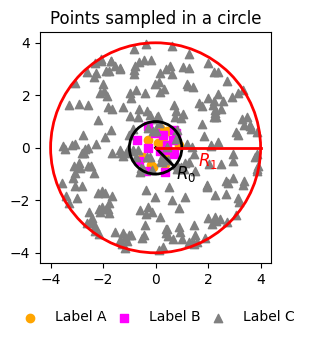

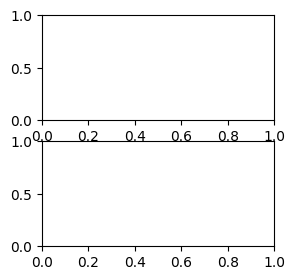

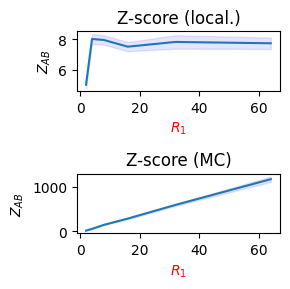

In [5]:
import numpy as np
import anndata
import squidpy as sq
import matplotlib.pyplot as plt
from nhood_enrichment import nhood_enrichment

np.random.seed(42)

points_per_area = 5
def sample(R):
    points = int(points_per_area * R**2 * np.pi)
    theta = np.random.rand(points) * 2 * np.pi
    radius = np.sqrt(np.random.rand(points)) * R
    x = np.cos(theta) * radius
    y = np.sin(theta) * radius
    return np.column_stack((x,y))


R0 = 1
R1 = 4

zscore_analytical_list = []
zscore_squidpy_list = []


fig, ax = plt.subplots(1,1, figsize=(3,3))

xy_A = sample(R0)
xy_B = sample(R0)
xy_C = sample(R1)


# Scatter plot for points with labels A, B, and C
ax.scatter(xy_A[:, 0], xy_A[:, 1], label='Label A', marker='o', color='orange')
ax.scatter(xy_B[:, 0], xy_B[:, 1], label='Label B', marker='s', color='magenta')
ax.scatter(xy_C[:, 0], xy_C[:, 1], label='Label C', marker='^', color='gray')

# Draw circles
circle_0 = plt.Circle((0, 0), R0, color='black', fill=False,  linewidth=2)
circle_1 = plt.Circle((0, 0), R1, color='red', fill=False, linewidth=2)

# Add circles to the plot
ax.add_patch(circle_0)
ax.add_patch(circle_1)

# Draw lines indicating the radius with LaTeX annotation
ax.annotate(fr'$R_0$', xy=(R0 / 2, 0), xytext=(R0 / 2 + 0.65, -1), ha='center', va='center', fontsize=12, color='black', zorder=5)
ax.annotate(fr'$R_1$', xy=(R1 / 2, 0.5), xytext=(R1 / 2, -0.5), ha='center', va='center', fontsize=12, color='red', zorder=5)

# Draw lines indicating the radius
ax.plot([0, np.cos(-np.deg2rad(45)) * R0], [0, np.sin(-np.deg2rad(45))*R0], color='black', linewidth=2, zorder=5)
ax.plot([0, R1], [0, 0], color='red', linewidth=2, zorder=5)

# Add legend outside the figure
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), frameon=False, ncol=3, columnspacing=0.25)

# Set axis equal for better visualization
ax.set_aspect('equal', adjustable='box')

# Show the plot
plt.title('Points sampled in a circle')
#plt.grid(True)
plt.show()



import numpy as np
import anndata
import squidpy as sq
import matplotlib.pyplot as plt
from nhood_enrichment import nhood_enrichment

np.random.seed(42)

points_per_area = 10
def sample(R):
    points = int(points_per_area * R**2 * np.pi)
    theta = np.random.rand(points) * 2 * np.pi
    radius = np.sqrt(np.random.rand(points)) * R
    x = np.cos(theta) * radius
    y = np.sin(theta) * radius
    return np.column_stack((x,y))


R0 = 1
R1 = [2,4,8,16,32,64]

zscore_analytical_list = []
zscore_squidpy_list = []


fig, axs = plt.subplots(2,1, figsize=(3,3))

for i,R1i in enumerate(R1):
    z_an = []
    z_sq = []
    for _ in range(10):
        xy_A = sample(R0)
        xy_B = sample(R0)
        xy_C = sample(R1i)
        xy = np.vstack((xy_A,xy_B,xy_C))
        labels = ['A'] * len(xy_A) + ['B'] * len(xy_B) + ['C'] * len(xy_C)
        adata = anndata.AnnData(obs={'labels' : labels}, obsm={'spatial' : xy})
        adata.obs['labels'] = adata.obs['labels'].astype('category')
        sq.gr.spatial_neighbors(adata,coord_type = 'generic', radius = R0)
        zscore_analytical, _ = nhood_enrichment(adata, cluster_key='labels', copy=True, radius_test=(R0, 2*R0))
        zscore_squidpy, _ = sq.gr.nhood_enrichment(adata, cluster_key='labels', copy=True, show_progress_bar=False)
        z_an.append(zscore_analytical[0,1])
        z_sq.append(zscore_squidpy[0,1])

    zscore_analytical_list.append(np.array(z_an))
    zscore_squidpy_list.append(np.array(z_sq))


zscore_squidpy_list = np.array(zscore_squidpy_list)
zscore_analytical_list = np.array(zscore_analytical_list)

z_score_analytical_mean = np.mean(zscore_analytical_list, axis=1)
z_score_analytical_ci = 1.96 * np.std(zscore_analytical_list,axis=1)/np.sqrt(zscore_analytical_list.shape[1])

z_score_squidpy_mean = np.mean(zscore_squidpy_list, axis=1)
z_score_squidpy_ci = 1.96 * np.std(zscore_squidpy_list,axis=1)/np.sqrt(zscore_squidpy_list.shape[1])

fig, axs = plt.subplots(2,1, figsize=(3,3))

axs[0].plot(R1,z_score_analytical_mean)
axs[0].fill_between(R1,(z_score_analytical_mean-z_score_analytical_ci), (z_score_analytical_mean+z_score_analytical_ci), color='b', alpha=.1)
axs[0].set_xlabel('$R_1$', color='red')
axs[0].set_ylabel('$Z_{AB}$')
axs[0].set_title('Z-score (local.)')

axs[1].plot(R1,z_score_squidpy_mean)
axs[1].fill_between(R1,(z_score_squidpy_mean-z_score_squidpy_ci), (z_score_squidpy_mean+z_score_squidpy_ci), color='b', alpha=.1)
axs[1].set_xlabel('$R_1$', color='red')
axs[1].set_ylabel('$Z_{AB}$')
axs[1].set_title('Z-score (MC)')


plt.tight_layout()
# Assuming R1, zscore_squidpy_list, and zscore_analytical_list are defined


    
    

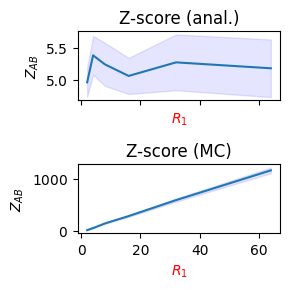

In [52]:
from matplotlib.ticker import ScalarFormatter

fig, axs = plt.subplots(2,1, figsize=(3,3), sharex=True)

axs[0].plot(R1,z_score_analytical_mean)
axs[0].fill_between(R1,(z_score_analytical_mean-z_score_analytical_ci), (z_score_analytical_mean+z_score_analytical_ci), color='b', alpha=.1)
axs[0].set_xlabel('$R_1$', color='red')
axs[0].set_ylabel('$Z_{AB}$')
axs[0].set_title('Z-score (anal.)')

axs[1].plot(R1,z_score_squidpy_mean)
axs[1].fill_between(R1,(z_score_squidpy_mean-z_score_squidpy_ci), (z_score_squidpy_mean+z_score_squidpy_ci), color='b', alpha=.1)
axs[1].set_xlabel('$R_1$', color='red')
axs[1].set_ylabel('$Z_{AB}$')
axs[1].set_title('Z-score (MC)')
axs[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))


plt.tight_layout()
# Assuming R1, zscore_squidpy_list, and zscore_analytical_list are defined


In [3]:
import numpy as np
import pandas as pd
import anndata
from scipy.stats import spearmanr, pearsonr
from nhood_enrichment import nhood_enrichment
import squidpy as sq


def load_osmFISH_data():
    csv = pd.read_csv(r'C:\Users\axela\Documents\GitHub\Points2Region_clean\datasets\osmFISH\osmFISH_real.csv')
    xy = csv[['X','Y']].to_numpy()
    adata = anndata.AnnData(obs={'Gene' : csv['Gene'].to_list()}, obsm={'spatial' : xy})
    adata.obs['Gene'] = adata.obs['Gene'].astype('category')
    return adata

def load_merfish_data():
    csv = pd.read_csv(r'C:\Users\axela\Documents\GitHub\Points2Region_clean\datasets\MERFISH\data.csv')
    xy = csv[['X','Y']].to_numpy()
    adata = anndata.AnnData(obs={'Gene' : csv['Gene'].to_list()}, obsm={'spatial' : xy})
    adata.obs['Gene'] = adata.obs['Gene'].astype('category')
    return adata  

datasets = [
    {
        'name' : 'Seqfish',
        'adata' : sq.datasets.seqfish(),
        'key' : 'celltype_mapped_refined',
        'library_key' : None
    },
    {
        'name' : 'IMC',
        'adata' : sq.datasets.imc(),
        'key' : 'cell type',
        'library_key' : None

    },
    {
        'name' : 'MERFISH',
        'adata' : sq.datasets.merfish(),
        'key' : 'Cell_class',
        'library_key' : 'batch'
    },
    {
        'name' : 'MIBI-TOF',
        'adata' : sq.datasets.mibitof(),
        'key' : 'Cluster',
        'library_key' : 'batch'
    },
    {
        'name' : 'Visium',
        'adata' : sq.datasets.visium_fluo_adata(),
        'key' : 'cluster',
        'library_key' : None
    },

    {
        'name' : '4i',
        'adata' : sq.datasets.visium_fluo_adata(),
        'key' : 'leiden',
        'library_key' : None
    },

    {
        'name' : 'osmFISH dataset (Genes)',
        'adata' : load_osmFISH_data(),
        'key' : 'Gene',
        'library_key' : None,
        'output_name' : 'osmFISH'
    },
    {
        'name' : 'MERFISH dataset (Genes)',
        'adata' : load_merfish_data(),
        'key' : 'Gene',
        'library_key' : None,
        'output_name' : 'merfish_genes'
    }
]

def pearson(a: np.ndarray, b: np.ndarray) -> float:
    return pearsonr(a.flatten(), b.flatten()).statistic

def spearman(a: np.ndarray, b: np.ndarray) -> float:
    p, _ = spearmanr(a.flatten(), b.flatten())
    return p

results = {
    'Dataset' : [],
    'Pearson' : [],
    'Spearman' : []
} 


R0 = 6
m = 0.065 # um per pixel
R0 = 5 / m
R1 = 2 * R0
dataset = datasets[6]
name = dataset['name']
print(name)
adata = dataset['adata']
library_key = dataset['library_key']
cluster_key = dataset['key']

# Incase several replicates, select first
if library_key is not None:
    ids = adata.obs[library_key]
    uid = ids.unique()[0]
    adata = adata[adata.obs[library_key] == uid]

# Compute neighbors
sq.gr.spatial_neighbors(adata, coord_type='generic', radius=R0)

# Compute zscores
zscore_analytical, _ = nhood_enrichment(adata, cluster_key=cluster_key, copy=True,  radius_test=(R0, R1))
zscore_squidpy, _ = sq.gr.nhood_enrichment(adata, cluster_key=cluster_key, copy=True, show_progress_bar=False)


zscore_squidpy[np.isnan(zscore_squidpy)] = 0
p, s = pearson(zscore_analytical, zscore_squidpy), spearman(zscore_analytical, zscore_squidpy)

results['Dataset'].append(name)
results['Spearman'].append(s)
results['Pearson'].append(p)

c:\Users\axela\anaconda3\envs\iss_decoding\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
c:\Users\axela\anaconda3\envs\iss_decoding\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
c:\Users\axela\anaconda3\envs\iss_decoding\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
c:\Users\axela\anaconda3\envs\iss_decoding\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
c:\Users\axela\anaconda3\envs\iss_decoding\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprec

osmFISH dataset (Genes)


In [4]:
results

{'Dataset': ['osmFISH dataset (Genes)'],
 'Pearson': [0.8816351759388912],
 'Spearman': [0.939316918760808]}